### 导包

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 导入数据

In [2]:
sms_data_path = "./sms_spam/"
print(os.listdir(sms_data_path))

['sms_test.txt', 'sms_train.txt', 'spam.csv']


In [3]:
sms_data = pd.read_csv(os.path.join(sms_data_path,"sms_train.txt"),encoding="utf-8",header=None,sep = '\t',names=["label","text"])
sms_data.head()

,label,text
0,ham,Ü collecting ur laptop then going to configure...
1,ham,"Sorry, I can't text &amp; drive coherently, se..."
2,spam,PRIVATE! Your 2003 Account Statement for shows...
3,ham,What's up. Do you want me to come online?
4,ham,The guy did some bitching but I acted like i'd...


In [4]:
sms_data.tail()

,label,text
3443,ham,Babe ! What are you doing ? Where are you ? Wh...
3444,ham,Think i might have to give it a miss. Am teach...
3445,ham,So that means you still think of teju
3446,ham,Is ur paper today in e morn or aft?
3447,ham,I'm thinking that chennai forgot to come for a...


In [5]:
# 统计垃圾和非垃圾邮件的数量
sms_data["label"].value_counts()

ham     3041
spam     407
Name: label, dtype: int64

Text(0.5, 1.0, 'Number of ham of spam messages')

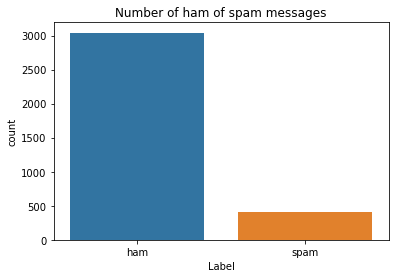

In [6]:
# 以图方式表示
sns.countplot(sms_data["label"])
plt.xlabel("Label")
plt.title("Number of ham of spam messages")

In [7]:
# 将标签ham和spam转换为0和1
sms_data["label_num"] = sms_data["label"].map({"ham":0,"spam":1})

In [8]:
sms_data.head()

,label,text,label_num
0,ham,Ü collecting ur laptop then going to configure...,0
1,ham,"Sorry, I can't text &amp; drive coherently, se...",0
2,spam,PRIVATE! Your 2003 Account Statement for shows...,1
3,ham,What's up. Do you want me to come online?,0
4,ham,The guy did some bitching but I acted like i'd...,0


### 数据分割

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(sms_data["text"],sms_data["label_num"],test_size=0.2,random_state=2019)

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2758,)
(2758,)
(690,)
(690,)


### 文本特征提取

文本特征提取
  - 将文本数据转换成特征向量的过程
  - 比较常用的文本特征表示法为词袋法
  
  词袋法：
   - 不考虑词语出现的顺序，每个出现过的词汇单独作为一列特征
   - 这些不重复的特征词汇集合为词表
   - 每一个文本都可以在很长的词表上统计出一个很多列的特征向量
   - 如果每个文本都出现的词汇，一般被标记为停用词 不计入特征向量
   
  主要有两个api来实现`CounterVectorizer`和`TfidfVectorizer`
  
 CountVectorizer:
   - 只考虑词汇在文本中出现的频率
   
 TfidfVectorizer:
   - 除了考量某词汇在文本出现的频率，还关注包含这个词汇的所有文本的数量
   - 能够消减高频没有意义的词汇出现带来的影响，挖掘更有意义的特征。

In [12]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [13]:
# 去除停用词
tfidf = TfidfVectorizer(analyzer="word",stop_words="english")

In [14]:
x_train_df = tfidf.fit_transform(x_train)

In [15]:
x_test_df = tfidf.transform(x_test)

In [16]:
print(type(x_train_df))

<class 'scipy.sparse.csr.csr_matrix'>


In [17]:
print(x_train_df.shape)

(2758, 5696)


In [18]:
print(tfidf.get_feature_names())

['00', '000', '000pes', '008704050406', '0089', '0121', '0125698789', '02', '0207', '02072069400', '02073162414', '021', '03', '04', '05', '0578', '06', '07', '07008009200', '07046744435', '07090201529', '07090298926', '07732584351', '0776xxxxxxx', '077xxx', '078', '07801543489', '07808247860', '07808726822', '07815296484', '078498', '07880867867', '0789xxxxxxx', '07946746291', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986906', '08081263000', '083', '0844', '08448714184', '0845', '08452810071', '08452810073', '0870', '08700435505150p', '08700469649', '08701237397', '08701417012', '08701417012150p', '087016248', '087018728737', '08702490080', '08702840625', '08704050406', '08706091795', '0870737910216yrs', '08707509020', '0870753331018', '08707808226', '08708034412', '08708800282', '08709222922', '08709501522', '0871', '087104711148', '08712103738', '08712300220', '08712317606', '08712400602450p', '087124

### 机器学习模型

### 机器模型大杂烩

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [20]:
models = {
    "SVC":SVC(kernel="linear"),
    "MultinomialNB":MultinomialNB(),
    "LogisticRegression":LogisticRegression(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "BaggingClassifier":BaggingClassifier(),
    "ExtraTreesClassifier":ExtraTreesClassifier()
}

prediction = dict()
score_map = {}

for model_name in models:
    model = models[model_name]
    model.fit(x_train_df,y_train)
    prediction[model_name]=model.predict(x_test_df)
    score=accuracy_score(y_test,prediction[model_name])
    score_map[model_name]=score

In [21]:
result = pd.DataFrame()
result["model"] = score_map.keys()
result["score" ]=score_map.values()
result["score"]=result["score"].apply(lambda x : x*100)

In [22]:
def plot_model_performace(result):
    sns.set_style("ticks")
    figsize=(22,6)
    
    ticksize=12
    titlesize=ticksize+8
    labelsize=ticksize+5
    
    xlabel="Model"
    ylabel="Score"
    
    title="Model Performance"
    
    params={"figure.figsize":figsize,
                    "axes.labelsize":labelsize,
                    "axes.titlesize":titlesize,
                    "xtick.labelsize":ticksize,
                    "ytick.labelsize":ticksize}
    
    plt.rcParams.update(params)
    
    col1="model"
    col2="score"
    sns.barplot(x=col1,y=col2,data=result)
    plt.title(title.title())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.grid()
    plt.plot()
    plt.show()
    print(result)

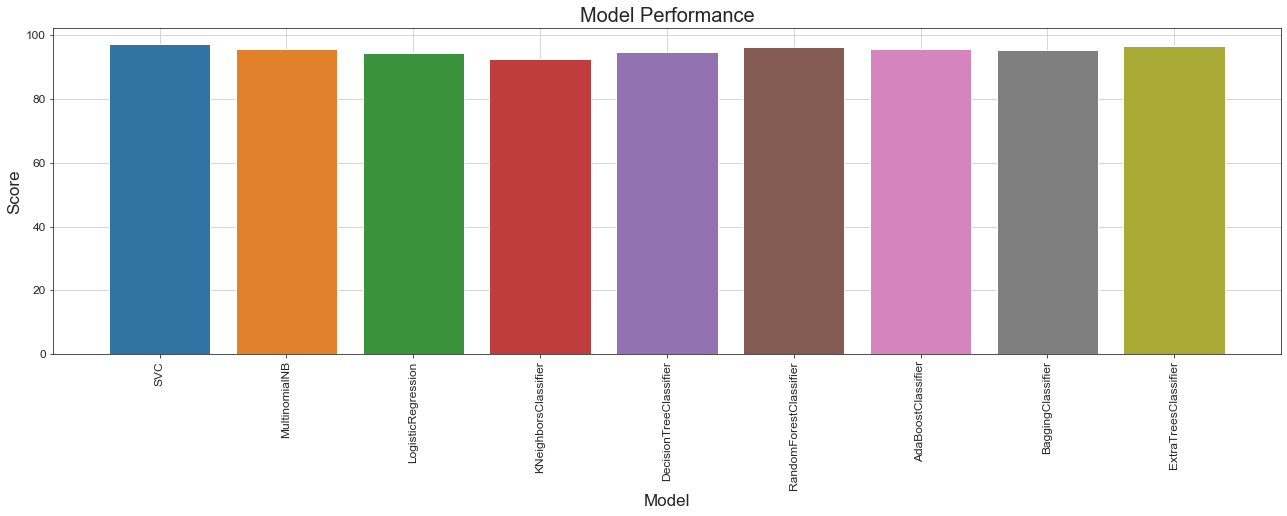

                    model      score
0                     SVC  97.246377
1           MultinomialNB  95.507246
2      LogisticRegression  94.347826
3    KNeighborsClassifier  92.318841
4  DecisionTreeClassifier  94.637681
5  RandomForestClassifier  96.231884
6      AdaBoostClassifier  95.652174
7       BaggingClassifier  95.217391
8    ExtraTreesClassifier  96.521739


In [23]:
plot_model_performace(result)

### 超参数调整

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "alpha":np.concatenate(
        [
            np.arange(0.0001,0.001,0.0001),
            np.arange(0.001,0.01,0.001),
            np.arange(0.01,0.1,0.01),
            np.arange(0.1,1,0.1),
            np.arange(1,10,1),
            np.arange(10,100,5)
        ]
    )
}
model = MultinomialNB()
grid_cv_model = GridSearchCV(model,param_grid,n_jobs=-1,verbose=3,cv=3)
grid_cv_model.fit(x_train_df,y_train)

Fitting 3 folds for each of 63 candidates, totalling 189 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:    2.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([1.0e-04, 2.0e-04, 3.0e-04, 4.0e-04, 5.0e-04, 6.0e-04, 7.0e-04,
       8.0e-04, 9.0e-04, 1.0e-03, 2.0e-03, 3.0e-03, 4.0e-03, 5.0e-03,
       6.0e-03, 7.0e-03, 8.0e-03, 9.0e-03, 1.0e-02, 2.0e-02, 3.0e-02,
       4.0e-02, 5.0e-02, 6...
       2.0e-01, 3.0e-01, 4.0e-01, 5.0e-01, 6.0e-01, 7.0e-01, 8.0e-01,
       9.0e-01, 1.0e+00, 2.0e+00, 3.0e+00, 4.0e+00, 5.0e+00, 6.0e+00,
       7.0e+00, 8.0e+00, 9.0e+00, 1.0e+01, 1.5e+01, 2.0e+01, 2.5e+01,
       3.0e+01, 3.5e+01, 4.0e+01, 4.5e+01, 5.0e+01, 5.5e+01, 6.0e+01,
       6.5e+01, 7.0e+01, 7.5e+01, 8.0e+01, 8.5e+01, 9.0e+01, 9.5e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [25]:
#对指标评价
print("{}{}".format("Best Estimator: ",grid_cv_model.best_estimator_))
print("{}{}".format("Besr Params: ",grid_cv_model.best_params_))
print("{}{}".format("Bset Scores: ",grid_cv_model.best_score_))

Best Estimator: MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)
Besr Params: {'alpha': 0.2}
Bset Scores: 0.9807831762146483


In [30]:
print(classification_report(y_test,prediction["MultinomialNB"],target_names=["Ham","Spam"]))

              precision    recall  f1-score   support

         Ham       0.95      1.00      0.98       621
        Spam       1.00      0.55      0.71        69

    accuracy                           0.96       690
   macro avg       0.98      0.78      0.84       690
weighted avg       0.96      0.96      0.95       690



In [31]:
# 混淆矩阵
def plot_confusion_matrix(y_test,y_pred,title=""):
    conf_mat=confusion_matrix(y_test,y_pred)
    conf_mat_normalized=conf_mat.astype("float")/conf_mat.sum(axis=1)[:,np.newaxis]
    
    figsize=(22,5)
    
    ticksize=18
    titlesize=ticksize+8
    labelsize=ticksize+5
    
    xlabel="Predicted label"
    ylabel="True label"
    
    params={"figure.figsize":figsize,
                   "axes.labelsize":labelsize,
                   "axes.titlesize":titlesize,
                    "xtick.labelsize":ticksize,
                    "ytick.labelsize":ticksize}
    
    plt.rcParams.update(params)
    
    plt.subplot(121)
    sns.heatmap(conf_mat,annot=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.subplot(122)
    sns.heatmap(conf_mat_normalized,annot=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
    print("Confusion  Matrix:\n")
    print(conf_mat)
    print("\n\nConfusion Matrix Normalized:\n")
    print(conf_mat_normalized)

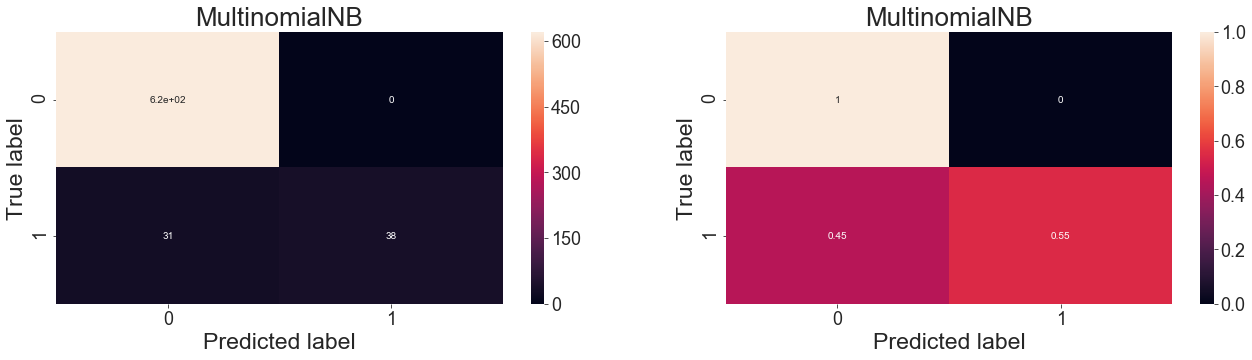

Confusion  Matrix:

[[621   0]
 [ 31  38]]


Confusion Matrix Normalized:

[[1.         0.        ]
 [0.44927536 0.55072464]]


In [32]:
plot_confusion_matrix(y_test,prediction["MultinomialNB"],title="MultinomialNB")

In [33]:
x_test[y_test<prediction["MultinomialNB"]]

Series([], Name: text, dtype: object)

In [34]:
x_test[y_test>prediction["MultinomialNB"]]

1683                    Call FREEPHONE 0800 542 0578 now!
1482    Hello darling how are you today? I would love ...
1407    U were outbid by simonwatson5120 on the Shinco...
1698    RECPT 1/3. You have ordered a Ringtone. Your o...
197     Romantic Paris. 2 nights, 2 flights from £79 B...
879     Free Msg: get Gnarls Barkleys "Crazy" ringtone...
1949    Congrats! 2 mobile 3G Videophones R yours. cal...
260     We have new local dates in your area - Lots of...
3228    FreeMsg:Feelin kinda lnly hope u like 2 keep m...
3091    You have 1 new voicemail. Please call 08719181503
2528    Jamster! To get your free wallpaper text HEART...
2027    We currently have a message awaiting your coll...
2176    Dear Subscriber ur draw 4 £100 gift voucher wi...
1224    For taking part in our mobile survey yesterday...
869     We know someone who you know that fancies you....
242     Oh my god! I've found your number again! I'm s...
923      You have 1 new message. Please call 08712400200.
1831          

### 提交

In [70]:
#train_data = pd.read_csv(os.path.join(sms_data_path,"sms_train.txt"),encoding="utf-8",header=None,sep = '\t',names=["label","text"])
train_data = pd.read_csv("./sms_spam/spam.csv",encoding="latin-1",delimiter=",")
train_data["label_num"] = train_data["label"].map({"ham":0,"spam":1})
x_train = train_data["text"]
y_train = train_data["label_num"]
x_train = tfidf.fit_transform(x_train)

In [71]:
train_data.head()

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0


In [37]:
# 数据导入
data = pd.read_csv(os.path.join(sms_data_path,"sms_test.txt"),encoding="utf-8",header=None,sep="\t",names=["text"])
data.head()

,text
0,Aiyo a bit pai seh ü noe... Scared he dun rem ...
1,Are you driving or training?
2,It means u could not keep ur words.
3,"Babe, I'm back ... Come back to me ..."
4,I don't think I can get away for a trek that l...


In [73]:
predict_data = data["text"]

In [74]:
# 文本特征提取
data_df = tfidf.transform(predict_data)

In [75]:
# 生成id
id = np.arange(0,len(data))
id += 1

In [76]:
# 1 Multinomial Naive bayes
model = MultinomialNB()
model.fit(x_train,y_train)
bayes_predict= model.predict(data_df)

In [77]:
# 生成提交文件
df = pd.DataFrame({"id":id,"predict":bayes_predict})
df.to_csv("bayes_submit.csv",index=None)

In [78]:
# 2 RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
random_forest_predict = model.predict(data_df)

In [79]:
# 生成提交文件
df = pd.DataFrame({"id":id,"predict":random_forest_predict})
df.to_csv("random_forest_submit.csv",index=None)

In [80]:
# 3 AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(x_train,y_train)
adaboost_predict = model.predict(data_df)

In [81]:
# 生成提交文件
df = pd.DataFrame({"id":id,"predict":adaboost_predict})
df.to_csv("adaboost_submit.csv",index=None)

In [82]:
# 4 SVM
model = SVC(kernel="linear")
model.fit(x_train,y_train)
svm_predict = model.predict(data_df)

In [83]:
# 生成提交文件
df = pd.DataFrame({"id":id,"predict":svm_predict})
df.to_csv("svm_submit.csv",index=None)

In [84]:
# 5 ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x_train,y_train)
extra_tree_predict=model.predict(data_df)

In [85]:
# 生成提交文件
df = pd.DataFrame({"id":id,"predict":extra_tree_predict})
df.to_csv("extra_tree_submit.csv",index=None)

### 模型结果融合

In [38]:
# 模型结果融合
df1 = pd.read_csv("./cnn_submit.csv")
df2 = pd.read_csv("./rnn_submit.csv")
df3 = pd.read_csv("./submit4.csv")


df1_predict = df1["predict"]
df2_predict = df2["predict"]
df3_predict = df3["predict"]

df_predict = df1_predict

for i in range(len(data)):
    if df1_predict[i] != df2_predict[i]:
        df_predict[i] = df3_predict[i]
    else:
        df_predict[i] = df1_predict[i]

id = np.arange(len(data))
id += 1

df = pd.DataFrame({"id":id,"predict":df_predict})
df.to_csv("submit5.csv",index=None)